In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv("Tomato & Potato Production.csv", sep = ',')

In [ ]:
df.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Crops and livestock products,Afghanistan,Area harvested,Potatoes,1961,ha,15000.0
1,Crops and livestock products,Afghanistan,Area harvested,Potatoes,1962,ha,15000.0
2,Crops and livestock products,Afghanistan,Area harvested,Potatoes,1963,ha,15000.0
3,Crops and livestock products,Afghanistan,Area harvested,Potatoes,1964,ha,15000.0
4,Crops and livestock products,Afghanistan,Area harvested,Potatoes,1965,ha,15000.0


In [ ]:
df.sample(16)

,Domain,Area,Element,Item,Year,Unit,Value
50605,Crops and livestock products,Uruguay,Area harvested,Tomatoes,1969,ha,2700.0
47379,Crops and livestock products,Trinidad and Tobago,Area harvested,Tomatoes,1989,ha,230.0
31934,Crops and livestock products,Montenegro,Production,Potatoes,2016,tonnes,29917.0
31839,Crops and livestock products,Mongolia,Production,Potatoes,1978,tonnes,48500.0
33285,Crops and livestock products,Netherlands,Area harvested,Potatoes,1974,ha,142012.0
3641,Crops and livestock products,Bangladesh,Production,Potatoes,1992,tonnes,1379320.0
37206,Crops and livestock products,Papua New Guinea,Yield,Tomatoes,2015,hg/ha,41752.0
1581,Crops and livestock products,Argentina,Yield,Potatoes,2017,hg/ha,328586.0
6682,Crops and livestock products,Bulgaria,Yield,Tomatoes,1978,hg/ha,294939.0
15067,Crops and livestock products,Dominican Republic,Area harvested,Tomatoes,1990,ha,5900.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52937 entries, 0 to 52936
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   52937 non-null  object 
 1   Area     52937 non-null  object 
 2   Element  52937 non-null  object 
 3   Item     52937 non-null  object 
 4   Year     52937 non-null  int64  
 5   Unit     52937 non-null  object 
 6   Value    52937 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.8+ MB


In [ ]:
# total unique values in df

df.nunique()

Domain         1
Area         195
Element        3
Item           2
Year          61
Unit           3
Value      34923
dtype: int64

C:\Users\Ask78\AppData\Local\Temp\ipykernel_3428\3578972069.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



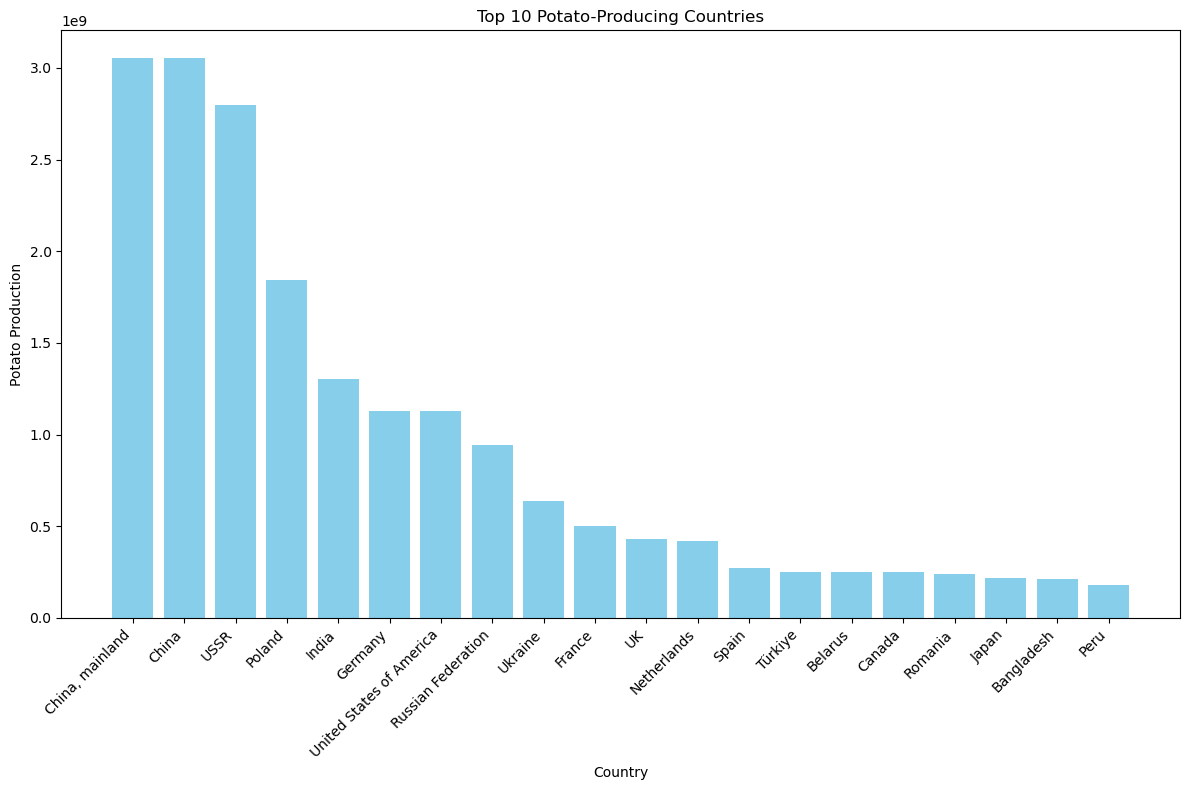

In [ ]:
# Filter the data for entries related to potatoes
potatoes_data = df[df['Item'] == 'Potatoes']

# Replace "United Kingdom of Great Britain and Northern Ireland" with "UK"
potatoes_data['Area'] = potatoes_data['Area'].replace(
    {'United Kingdom of Great Britain and Northern Ireland': 'UK'}
)

# Group the filtered data by country to get total production for each country
grouped_data = potatoes_data.groupby('Area')['Value'].sum().reset_index()

# Sort the data by production in descending order to get top 10
top_10 = grouped_data.sort_values(by='Value', ascending=False).head(20)

# Plot the top 10 potato-producing countries
plt.figure(figsize=(12, 8))
plt.bar(top_10['Area'], top_10['Value'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Potato Production')
plt.title('Top 10 Potato-Producing Countries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\Ask78\AppData\Local\Temp\ipykernel_3428\2313917089.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



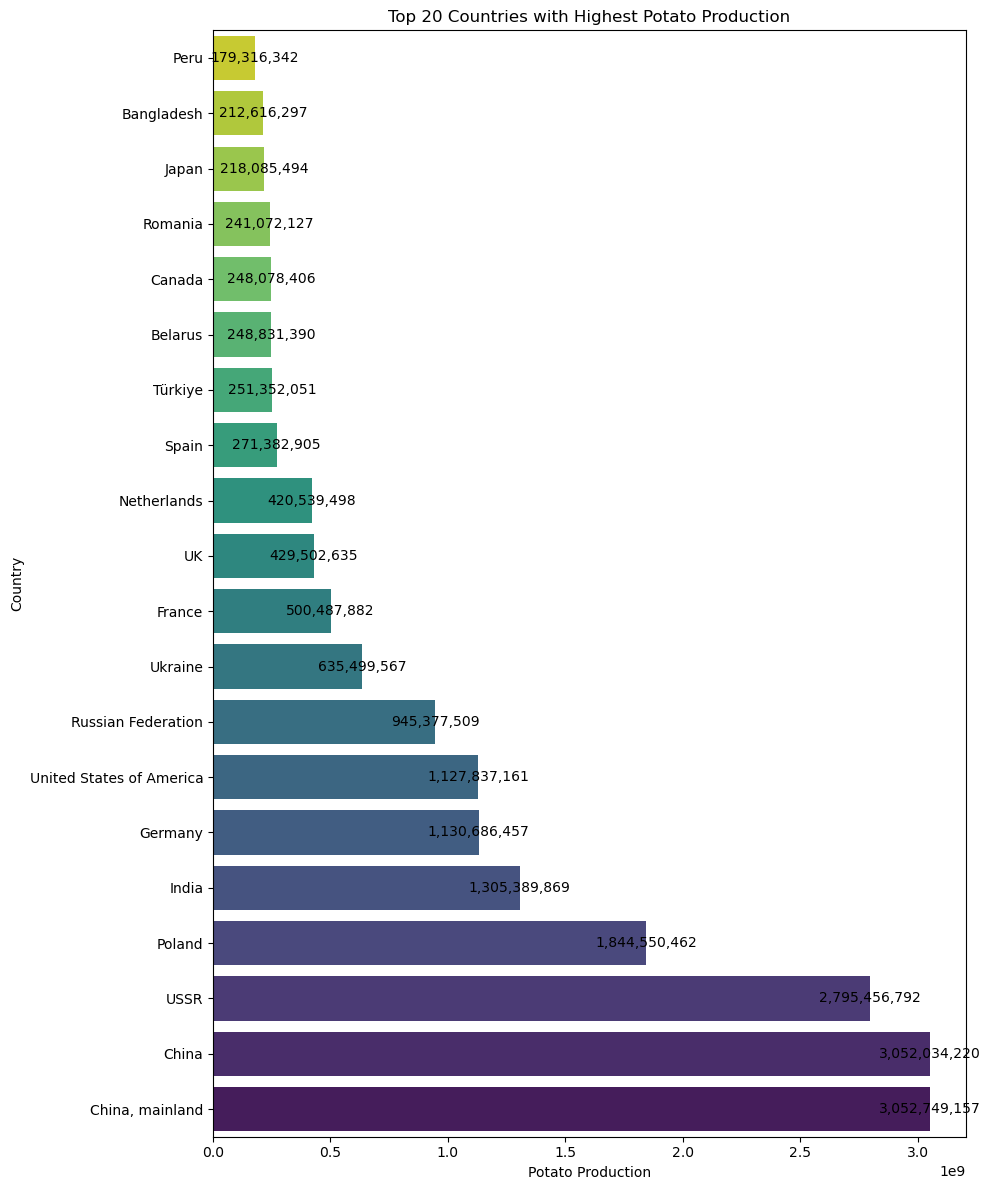

In [ ]:
# Replace "United Kingdom of Great Britain and Northern Ireland" with "UK"
potatoes_data['Area'] = potatoes_data['Area'].replace(
    {'United Kingdom of Great Britain and Northern Ireland': 'UK'}
)

# Group the filtered data by year and country to get total production for each year in each country
grouped_data = potatoes_data.groupby(['Area'])['Value'].sum().reset_index()

# Sort the data by total production in descending order
top_20 = grouped_data.nlargest(20, 'Value')

# Create a horizontal bar plot with a dark background
plt.figure(figsize=(10, 12))
sns.barplot(x='Value', y='Area', data=top_20, palette='viridis', orient='h')
plt.xlabel('Potato Production')
plt.ylabel('Country')
plt.title('Top 20 Countries with Highest Potato Production')

# Adding rounded integer values on the bars
for index, value in enumerate(top_20['Value']):
    plt.text(value, index, f'{int(value):,}', ha='center', va='center', fontsize=10)

# Inverting the y-axis for better visualization (largest at the top)
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px
# Replace "United Kingdom of Great Britain and Northern Ireland" with "UK"
potatoes_data.loc[potatoes_data['Area'] == 'United Kingdom of Great Britain and Northern Ireland', 'Area'] = 'UK'

# Group the filtered data by country to get total production for each country over all years
total_production = potatoes_data.groupby('Area')['Value'].sum().reset_index()

# Select the top 20 countries with the highest total production
top_20_countries = total_production.nlargest(10, 'Value')['Area'].tolist()

# Filter the original data for only the top 20 countries
potatoes_top_20 = potatoes_data[potatoes_data['Area'].isin(top_20_countries)]

# Group the filtered data by year and country to get total production for each year in each country
grouped_data = potatoes_top_20.groupby(['Area', 'Year'])['Value'].sum().reset_index()

# Create an animated line chart using Plotly
fig = px.line(grouped_data, x='Year', y='Value', color='Area', title='Potato Production by Year for Top 20 Countries')
fig.update_layout(xaxis_title='Year', yaxis_title='Potato Production', legend_title='Country')
fig.update_traces(mode='lines+markers')  # Add markers to the lines for better visibility

# Create and display the animated plot
fig.show()